# Convolution Nets for MNIST

In [1]:
#Import the required libraries
import numpy as np
np.random.seed(1338)

from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
from keras.models import Sequential

In [3]:
from keras.layers.core import Dense, Dropout, Activation, Flatten

In [4]:
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

In [5]:
from keras.utils import np_utils
from keras.optimizers import SGD

## Loading Data

In [6]:
path_to_dataset = "/home/ubuntu/deep-learning-keras-tensorflow/data/mnist.pkl.gz"

#Load the training and testing data
(X_train, y_train), (X_test, y_test) = mnist.load_data(path_to_dataset)

In [7]:
X_test_orig = X_test

## Data Preparation

In [9]:
img_rows, img_cols = 28, 28
nb_classes = 10

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train,nb_classes)
Y_test = np_utils.to_categorical(y_test,nb_classes)


In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
Y_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [12]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


# A simple CNN

In [13]:
#Initializing the values for the convolution neural network
nb_epoch = 2
batch_size = 128
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

### Step 1: Model Definition

In [15]:
model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_rows, img_cols,1)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

### Step 2: Compile

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### Step 3: Fit

In [17]:
model.fit(X_train, Y_train, batch_size=batch_size, 
          nb_epoch=2,verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 28s - loss: 2.3017 - acc: 0.1125 - val_loss: 2.3009 - val_acc: 0.1135
Epoch 2/2
60000/60000 [==============================] - 30s - loss: 2.3010 - acc: 0.1124 - val_loss: 2.3007 - val_acc: 0.1135


### Step 4: Evaluate

In [18]:
# Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 2.300694767
Test accuracy: 0.1135


### Let's plot our model Predictions!

In [19]:
import matplotlib.pyplot as plt

%matplotlib inline

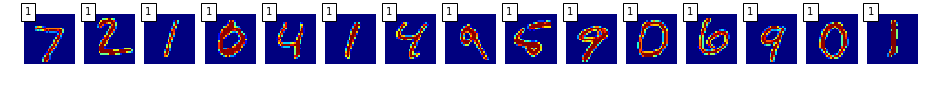

In [20]:
slice = 15
predicted = model.predict(X_test[:slice]).argmax(-1)

plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_test_orig[i], interpolation='nearest')
    plt.text(0, 0, predicted[i], color='black', 
             bbox=dict(facecolor='white', alpha=1))
    plt.axis('off')

# Adding more Dense Layers

In [21]:
model = Sequential()
model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_rows, img_cols,1)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          nb_epoch=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 38s - loss: 2.3016 - acc: 0.1143 - val_loss: 2.3009 - val_acc: 0.1135
Epoch 2/2
60000/60000 [==============================] - 32s - loss: 2.3008 - acc: 0.1124 - val_loss: 2.3004 - val_acc: 0.1135


In [23]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 2.30036722908
Test accuracy: 0.1135


# Adding Dropout

In [24]:
import tensorflow as tf
tf.python.control_flow_ops = tf

model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_rows, img_cols,1)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          nb_epoch=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 33s - loss: 2.3015 - acc: 0.1131 - val_loss: 2.3009 - val_acc: 0.1135
Epoch 2/2
60000/60000 [==============================] - 33s - loss: 2.3009 - acc: 0.1123 - val_loss: 2.3005 - val_acc: 0.1135


In [26]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 2.30049986649
Test accuracy: 0.1135


# Adding more Convolution Layers

In [28]:
model = Sequential()
model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_rows, img_cols,1)))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))
    
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [29]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          nb_epoch=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 67s - loss: 2.3019 - acc: 0.1117 - val_loss: 2.3013 - val_acc: 0.1135
Epoch 2/2
60000/60000 [==============================] - 70s - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135


In [30]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 2.3010143692
Test accuracy: 0.1135


# Exercise

Define and train a convnet with the following architecture:
* ConvLayer with 16 filters of 3 by 3
* relu activation
* Pooling layer of 2x2
* ConvLayer with 32 filters of 3 by 3
* relu activation
* Pooling layer of 2x2
* drop out of 0.5
* fully connected layer with 128 neurons
* relu activation
* drop out of 0.5
* fully connected layer with 128 neurons
* relu activation
* fully connected layer with neuron for every class
* softmax activation

# Solution

In [33]:
# Function for constructing the convolution neural network
# Feel free to add parameters, if you want

model = Sequential()
model.add(Convolution2D(16, 3, 3,
                    border_mode='valid',
                    input_shape=(img_rows, img_cols,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128))`
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
          optimizer='sgd',
          metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, 
          nb_epoch=5,verbose=1,
          validation_data=(X_test, Y_test))


#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 17s - loss: 2.3018 - acc: 0.1117 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 2/5
60000/60000 [==============================] - 17s - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 3/5
60000/60000 [==============================] - 18s - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3009 - val_acc: 0.1135
Epoch 4/5
60000/60000 [==============================] - 15s - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3009 - val_acc: 0.1135
Epoch 5/5
60000/60000 [==============================] - 18s - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3009 - val_acc: 0.1135
Test score: 2.3009163681
Test accuracy: 0.1135
